In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import lzma
import pickle

from matplotlib.lines import Line2D

In [2]:
load_Dir = "../Data/"

In [3]:
#lambda=0.5
rho_cc_tab_2_l5 = [1, 0.45, 0.29 ,0.23, 0.1275, 0.0875, 0.062, 0.045, 0.03475, 0.026, 0.0205, 0.0155]
rho_IT_tab_2_l5 = [1, 0.64, 0.425, 0.305, 0.195 , 0.164, 0.1475, 0.095, 0.067, 0.048, 0.0365, 0.0275, 0.021, 0.016, 0.012]
rho_sd_tab_2_l5 = [0, 0.07 , 0.04 ,0.02, 0.005, 0.003, 0.002, 0.002, 0.0015, 0.001, 0.0001, 0.0001]
rho_sd_IT_tab_2_l5 = [0,0.05 ,0.04, 0.03, 0.015 , 0.009 ,0.0075, 0.004, 0.002, 0.0025, 0.0015, 0.001, 0.00075, 0.0005, 0.0005]
al_tab_IT_2_l5 = [8.6,9.04,9.51,10.,11.32, 12.1,  12.91549665,  16.68100537,  21.5443469 ,  27.82559402, 35.93813664,  46.41588834,  59.94842503,  77.42636827, 100.]
al_tab_2_l5 = [10.6,11.32,12.1, 12.91549665,  16.68100537,  21.5443469 ,  27.82559402, 35.93813664,  46.41588834,  59.94842503,  77.42636827, 100.]

In [4]:
#file_name = "DF_20250217-c0_a2.xz"
file_name = "DF_20250703-142005_162.xz"
with lzma.open(load_Dir + file_name, "rb") as f:
    data_frame_tot = pickle.load(f)

In [5]:
#data_frame_tot.iloc[:,-10:]
data_frame_tot[r"$\rho$"] = data_frame_tot["M"]

In [6]:
np.array(sorted(data_frame_tot[r"$N$"].unique())) / np.flip(np.array(sorted(data_frame_tot[r"$M$"].unique())))

array([  4.9998323 ,   9.03983764,   9.50982962,  10.        ,
        11.31970729,  12.10018262,  12.91572327,  16.68041658,
        21.54351358,  27.82513517,  35.94004796,  46.4173054 ,
        59.95044522,  77.42366916, 100.        ])

In [7]:
sorted(data_frame_tot[r"$M$"].unique())

[np.int64(4000),
 np.int64(4546),
 np.int64(5166),
 np.int64(5871),
 np.int64(6672),
 np.int64(7583),
 np.int64(8618),
 np.int64(9794),
 np.int64(11130),
 np.int64(11499),
 np.int64(11889),
 np.int64(12649),
 np.int64(12971),
 np.int64(13304),
 np.int64(17889)]

In [8]:
Ns = np.array([89442, 126490, 185662])

In [9]:
df0 = data_frame_tot[data_frame_tot[r"$N$"] == Ns[0]]
df1 = data_frame_tot[(data_frame_tot[r"$N$"] == Ns[1]) & (data_frame_tot[r"$M$"] == 12649) & ((data_frame_tot[r"$\rho$"] == 0.) | (data_frame_tot[r"$\rho$"] == 0.1) | (data_frame_tot[r"$\rho$"] == 0.2) | (data_frame_tot[r"$\rho$"] == 0.3) | (data_frame_tot[r"$\rho$"] == 0.4) | (data_frame_tot[r"$\rho$"] == 0.5) | (data_frame_tot[r"$\rho$"] == 0.6) | (data_frame_tot[r"$\rho$"] == 0.7) | (data_frame_tot[r"$\rho$"] == 0.8) | (data_frame_tot[r"$\rho$"] == 0.9) | (data_frame_tot[r"$\rho$"] == 1.))]
df2 = data_frame_tot[data_frame_tot[r"$N$"] == Ns[2]]

In [10]:
df2[r"$M$"].unique()

array([8618])

In [11]:
l = len(df0)
print(l)
i=0
while (i < l-1):
    dict = {}
    dict[r"$\rho$"] = df0.iloc[i][r"$\rho$"]
    dict[r"delta_free_entropy"] = df0.iloc[i][r"total_free_entropy"] - df0.iloc[i+1][r"total_free_entropy"]
    dict["delta_O"] = df0.iloc[i][r"$O_{t=0}$"] - df0.iloc[i][r"$MO_{t=0}$"]
    dict[r"$\widetilde{O}_{t=0}$"] = df0.iloc[i][r"$\widetilde{O}_{t=0}$"]
    dict[r"$1-\widetilde{O}_{t=0}$"] = 1 - df0.iloc[i][r"$\widetilde{O}_{t=0}$"]

    if i == 0:
        df_diff0 = pd.DataFrame(dict, index=[0])
    else:
        df_diff0 = pd.concat([df_diff0, pd.DataFrame(dict, index=[0])], ignore_index=True)
    i += 2

len(df_diff0)

220


110

In [12]:
l = len(df1)
print(l)
i=0
while (i < l-1):
    dict = {}
    dict[r"$\rho$"] = df1.iloc[i][r"$\rho$"]
    dict[r"delta_free_entropy"] = df1.iloc[i][r"total_free_entropy"] - df1.iloc[i+1][r"total_free_entropy"]
    dict["delta_O"] = df1.iloc[i][r"$O_{t=0}$"] - df1.iloc[i][r"$MO_{t=0}$"]
    dict[r"$\widetilde{O}_{t=0}$"] = df1.iloc[i][r"$\widetilde{O}_{t=0}$"]
    dict[r"$1-\widetilde{O}_{t=0}$"] = 1 - df1.iloc[i][r"$\widetilde{O}_{t=0}$"]
    

    if i == 0:
        df_diff1 = pd.DataFrame(dict, index=[0])
    else:
        df_diff1 = pd.concat([df_diff1, pd.DataFrame(dict, index=[0])], ignore_index=True)
    i += 2

len(df_diff1)

220


110

In [13]:
l = len(df2)
print(l)
i=0
while (i < l-1):
    dict = {}
    dict[r"$\rho$"] = df2.iloc[i][r"$\rho$"]
    dict[r"delta_free_entropy"] = df2.iloc[i][r"total_free_entropy"] - df2.iloc[i+1][r"total_free_entropy"]
    dict["delta_O"] = df2.iloc[i][r"$O_{t=0}$"] - df2.iloc[i][r"$MO_{t=0}$"]
    dict[r"$\widetilde{O}_{t=0}$"] = df2.iloc[i][r"$\widetilde{O}_{t=0}$"]
    dict[r"$1-\widetilde{O}_{t=0}$"] = 1 - df2.iloc[i][r"$\widetilde{O}_{t=0}$"]
    

    if i == 0:
        df_diff2 = pd.DataFrame(dict, index=[0])
    else:
        df_diff2 = pd.concat([df_diff2, pd.DataFrame(dict, index=[0])], ignore_index=True)
    i += 2

len(df_diff2)

408


204

In [14]:
df_diff_0 = df_diff0[(abs(df_diff0["delta_O"]) < 0.001) & (abs(df_diff0["delta_free_entropy"]) <0.2)]
df_diff_1 = df_diff1[(abs(df_diff1["delta_O"]) < 0.0001) & (abs(df_diff1["delta_free_entropy"]) <0.2)]
df_diff_2 = df_diff2[(abs(df_diff2["delta_O"]) < 0.01) & (abs(df_diff2["delta_free_entropy"]) <0.01)]
len(df_diff_1)

76

/var/folders/w6/zx_nxxqs3gdcq636sf5z6z2m0000gn/T/ipykernel_82634/3991245868.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  ax.axhline(0., color=plt.cm.get_cmap('tab10')(0), linestyle='--')


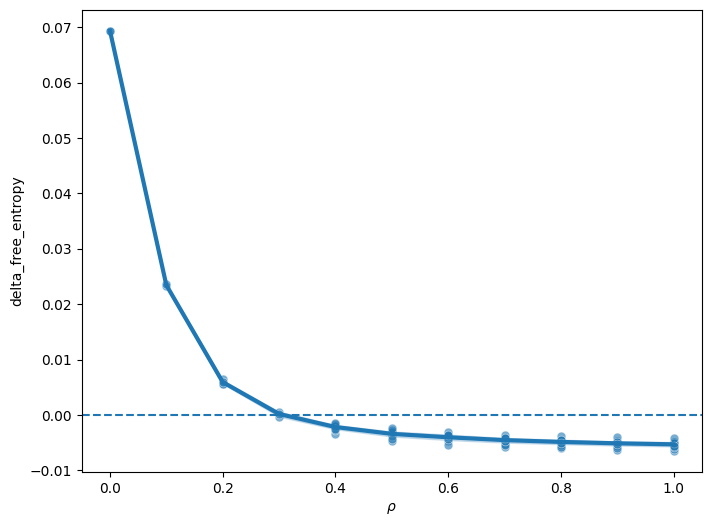

In [15]:
fig, ax = plt.subplots( figsize=(8, 6))
#fig.suptitle(r'$\kappa=2$, $N * M = 2.5 \times 10^9$, $\alpha=12.91$')
y_s = r"delta_free_entropy"#"total_free_entropy"
sns.scatterplot(data=df_diff_1,x=r"$\rho$",y=y_s, alpha=0.6, s=40, ax=ax, legend=False, color="tab:blue")
sns.lineplot(data=df_diff_1,x=r"$\rho$",y=y_s, errorbar="ci", linewidth=3, ax=ax, color="tab:blue")
#sns.scatterplot(data=df_inf,x=r"$\rho$",y=y_s, alpha=0.6, s=40, ax=ax, legend=False, color="tab:orange")
#sns.lineplot(data=df_inf,x=r"$\rho$",y=y_s, errorbar="ci", linewidth=3, ax=ax, color="tab:orange")



ax.axhline(0., color=plt.cm.get_cmap('tab10')(0), linestyle='--')
#ax.axhline(-np.log(2)/4, color=plt.cm.get_cmap('tab10')(1), linestyle='--')
#ax.axhline(-np.log(2)/8, color=plt.cm.get_cmap('tab10')(2), linestyle='--')
#ax.set_xlim(0.065, 0.1)

Text(0, 0.5, '$1-\\widetilde{O}_{t=0}$')

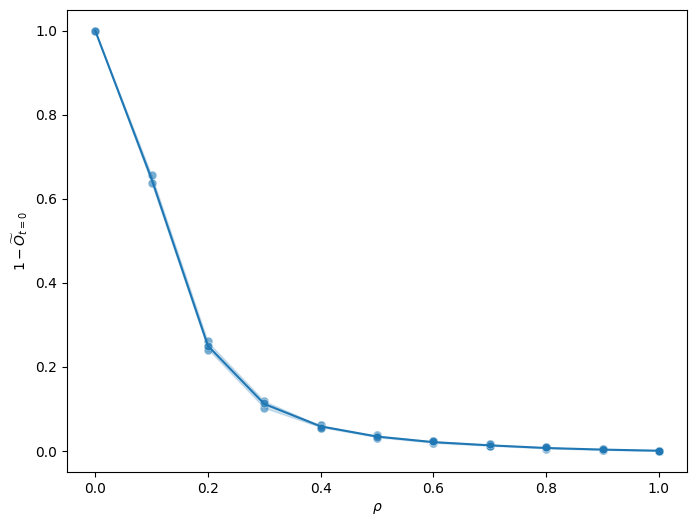

In [16]:
fig, ax = plt.subplots( figsize=(8, 6))
#fig.suptitle(r'$\kappa=-2$, $N * M =  10^8$, $\lambda=0.5$')
sns.lineplot(data=df_diff_1,x=r"$\rho$",y=r"$1-\widetilde{O}_{t=0}$",errorbar="ci",legend=False,)
sns.scatterplot(data=df_diff_1,x=r"$\rho$",y=r"$1-\widetilde{O}_{t=0}$", alpha=0.6, s=40, ax=ax,)
ax.set_xlabel(r"$\rho$")
ax.set_ylabel(r"$1-\widetilde{O}_{t=0}$")
#ax.set_xlim(0.065, 0.1)
#ax.set_yscale('log')#, linthresh=0.000001)
#fig.savefig("out.pdf")

In [17]:
sns.set_theme(style="whitegrid", font_scale=1.3)

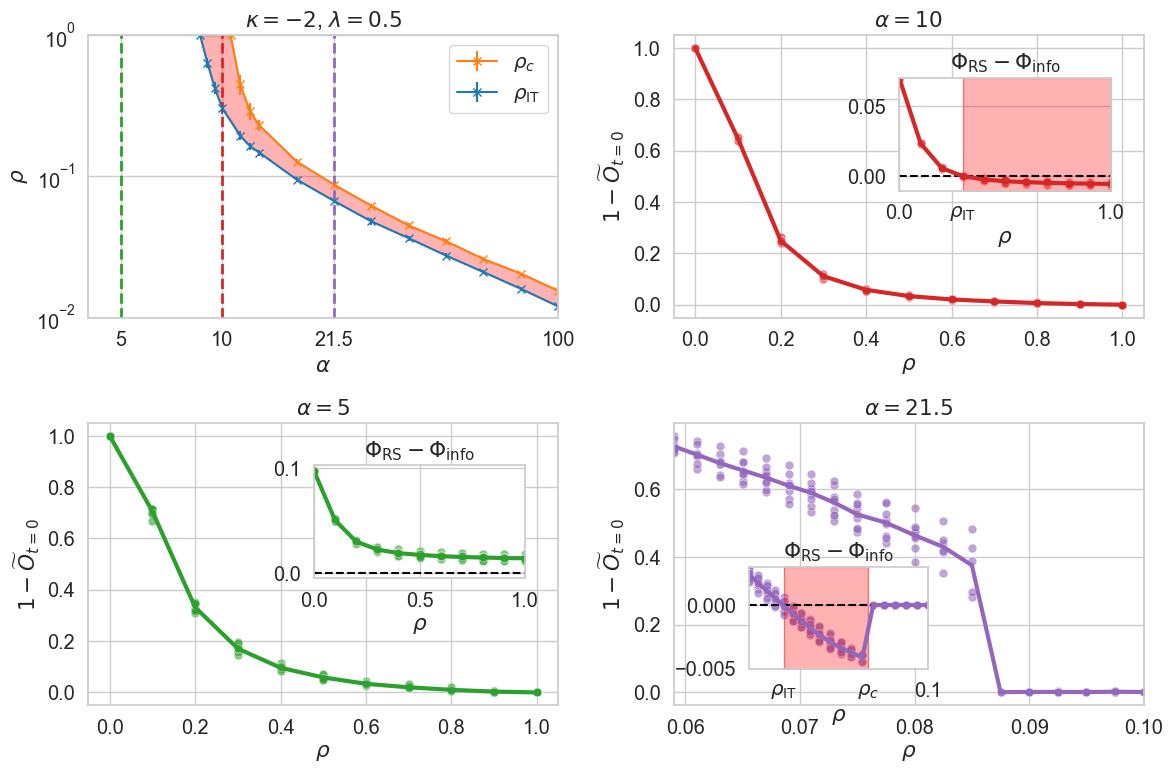

In [21]:
# 2x2 plot, in each $1-\widetilde{O}_{t=0}$" as inset and r"delta_free_entropy" as main plot. One blank, one df_diff_0, one df_diff_1, one df_diff_2
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

ax = axs[0,0]
ax.set_title(r'$\kappa=-2$, $\lambda=0.5$')
ax.errorbar(al_tab_2_l5,rho_cc_tab_2_l5,yerr=rho_sd_tab_2_l5,fmt='x-',label=r'$\rho_c$', color='tab:orange')
ax.errorbar(al_tab_IT_2_l5,rho_IT_tab_2_l5,yerr=rho_sd_IT_tab_2_l5,fmt='x-',label=r'$\rho_{\rm IT}$', color='tab:blue')

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$\alpha$')
ax.set_ylabel(r'$\rho$')
ax.set_ylim(1e-2, 1)
ax.set_xlim(4, 100)
#ax.axvline(7.9573, color='red', linestyle='--', label=r'$\alpha=\alpha_{\rm AMP}$')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, loc='upper right')

x_start = 8.6
x_end = 100

x1 = al_tab_2_l5
y1 = rho_cc_tab_2_l5

x2 = al_tab_IT_2_l5
y2 = rho_IT_tab_2_l5

y_start = 1#y1[0] if x_start == x1[0] else y2[0]
y1_end = y1[-1] if x_end == x1[-1] else y2[-1]
y2_end = y2[-1]# if x_end == x1[-1] else y2[-1]

# Ensure all points from x1 and x2 are included in the interpolation
x_combined = sorted(set(np.r_[x_start, x1, x2, x_end]))
y1_combined = np.interp(x_combined, np.r_[x_start, x1, x_end], np.r_[y_start, y1, y1_end])
y2_combined = np.interp(x_combined, np.r_[x_start, x2, x_end], np.r_[y_start, y2, y2_end])

# Add the last point explicitly to ensure it is included
x_combined.append(x_end)
y1_combined = np.append(y1_combined, y1[-1])
y2_combined = np.append(y2_combined, y2[-1])

ax.axvline(x=5, linestyle='--', linewidth=2, color='tab:green')
ax.axvline(x=10, linestyle='--', linewidth=2, color='tab:red')
ax.axvline(x=21.5, linestyle='--', linewidth=2, color='tab:purple')
ax.set_xticks([5, 10, 21.5, 100])
ax.set_xticklabels([5, 10, 21.5, 100])

# Fill the area between the two interpolated curves
ax.fill_between(x_combined, y1_combined, y2_combined, color="red", alpha=0.3)

ax = axs[1, 0]
ax.set_title(r'$\alpha=5$')
ys_2 = "delta_free_entropy"
ys_1 = r"$1-\widetilde{O}_{t=0}$" 
sns.lineplot(data=df_diff_0,x=r"$\rho$",y=ys_1, errorbar=None, linewidth=3, ax=ax,color="tab:green")
sns.scatterplot(data=df_diff_0,x=r"$\rho$",y=ys_1, alpha=0.6, s=40, ax=ax,color="tab:green")
#plot of logZ vs rho as inset
axins = ax.inset_axes([0.48, 0.45, 0.45, 0.4])  # [x, y, width, height]
axins.axhline(0., color='black', linestyle='--')
sns.lineplot(data=df_diff_0,x=r"$\rho$",y=ys_2, ax=axins, errorbar=None, linewidth=3,color="tab:green")
sns.scatterplot(data=df_diff_0,x=r"$\rho$",y=ys_2, alpha=0.6, s=40, ax=axins,color="tab:green")
axins.set_xlabel(r"$\rho$")
axins.set_ylabel("")
axins.set_xlim(0., 1.)
ax.set_ylabel(ys_1)
axins.set_title(r"$\Phi_{\rm RS} - \Phi_{\rm info}$")

ax = axs[0, 1]
ax.set_title(r'$\alpha=10$')
ys_2 = "delta_free_entropy"
ys_1 = r"$1-\widetilde{O}_{t=0}$" 
sns.lineplot(data=df_diff_1,x=r"$\rho$",y=ys_1, errorbar=None, linewidth=3, ax=ax,color="tab:red")
sns.scatterplot(data=df_diff_1,x=r"$\rho$",y=ys_1, alpha=0.6, s=40, ax=ax,color="tab:red")
#plot of logZ vs rho as inset
axins = ax.inset_axes([0.48, 0.45, 0.45, 0.4])  # [x, y, width, height]
axins.axhline(0., color='black', linestyle='--')
sns.lineplot(data=df_diff_1,x=r"$\rho$",y=ys_2, ax=axins, errorbar=None, linewidth=3,color="tab:red")
sns.scatterplot(data=df_diff_1,x=r"$\rho$",y=ys_2, alpha=0.6, s=40, ax=axins,color="tab:red")
axins.set_xlabel(r"$\rho$")
axins.set_ylabel("")
axins.set_xlim(0., 1.)
axins.set_ylim(-0.01, 0.07)
ax.set_ylabel(ys_1)
axins.set_title(r"$\Phi_{\rm RS} - \Phi_{\rm info}$")
x = [0.3,1]
y = [axins.get_ylim()[0], axins.get_ylim()[1]]
axins.fill_between(x, y[0], y[1], color='red', alpha=0.3)
axins.set_xticks([0., 0.3 , 1.])
axins.set_xticklabels([0.0, r"$\rho_{\rm IT}$", 1.0])

ax = axs[1,1]
ax.set_title(r'$\alpha=21.5$')
ys_2 = "delta_free_entropy"
ys_1 = r"$1-\widetilde{O}_{t=0}$" 
sns.lineplot(data=df_diff_2,x=r"$\rho$",y=ys_1, errorbar=None, linewidth=3, ax=ax,color="tab:purple")
sns.scatterplot(data=df_diff_2,x=r"$\rho$",y=ys_1, alpha=0.6, s=40, ax=ax,color="tab:purple")
#plot of logZ vs rho as inset
axins = ax.inset_axes([0.16, 0.13, 0.38, 0.36])  # [x, y, width, height]
axins.axhline(0., color='black', linestyle='--')
sns.lineplot(data=df_diff_2,x=r"$\rho$",y=ys_2, ax=axins, errorbar=None, linewidth=3,color="tab:purple")
sns.scatterplot(data=df_diff_2,x=r"$\rho$",y=ys_2, alpha=0.6, s=40, ax=axins,color="tab:purple")
axins.set_xlabel(r"$\rho$")
axins.set_ylabel("")
ax.set_ylabel(ys_1)
axins.set_title(r"$\Phi_{\rm RS} - \Phi_{\rm info}$")
ax.set_xlim(0.059, 0.1)
axins.set_ylim(-0.005, 0.003)
axins.set_xlim(0.059, 0.1)
#axins.set_xticks([0.07, 0.08, 0.09, 0.1])
axins.set_xticks([0.067, 0.08625 , 0.1])
axins.set_xticklabels([r"$\rho_{\rm IT}$", r"$\rho_{c}$", 0.1])
x = [0.067,0.08625]
y = [axins.get_ylim()[0], axins.get_ylim()[1]]
axins.fill_between(x, y[0], y[1], color='red', alpha=0.3)

fig.tight_layout()
fig.savefig("../Plots/Figure9.pdf")

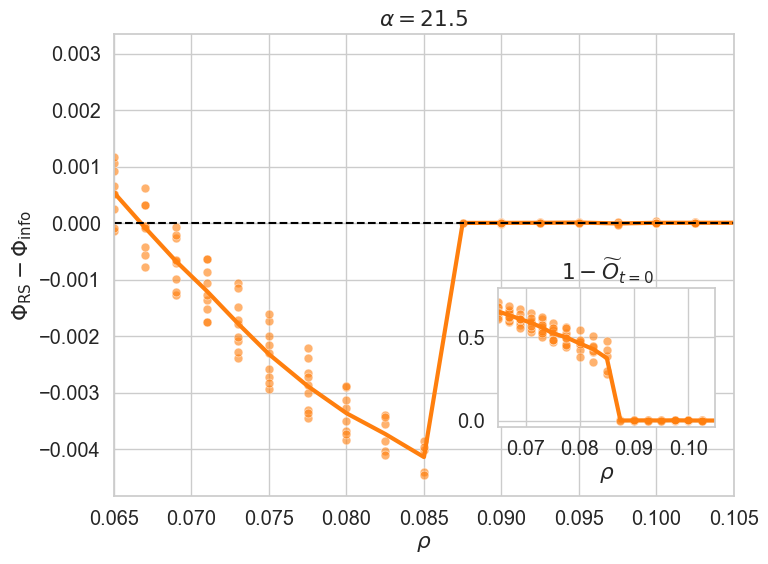

In [19]:
fig,ax = plt.subplots(figsize=(8, 6))
ax.set_title(r'$\alpha=21.5$')
ys_1 = "delta_free_entropy"
ys_2 = r"$1-\widetilde{O}_{t=0}$" 
sns.lineplot(data=df_diff_2,x=r"$\rho$",y=ys_1, errorbar=None, linewidth=3, ax=ax,color="tab:orange")
sns.scatterplot(data=df_diff_2,x=r"$\rho$",y=ys_1, alpha=0.6, s=40, ax=ax,color="tab:orange")
#plot of logZ vs rho as inset
axins = ax.inset_axes([0.62, 0.15, 0.35, 0.3])  # [x, y, width, height]
ax.axhline(0., color='black', linestyle='--')
sns.lineplot(data=df_diff_2,x=r"$\rho$",y=ys_2, ax=axins, errorbar=None, linewidth=3,color="tab:orange")
sns.scatterplot(data=df_diff_2,x=r"$\rho$",y=ys_2, alpha=0.6, s=40, ax=axins,color="tab:orange")
axins.set_xlabel(r"$\rho$")
axins.set_ylabel("")
axins.set_title(ys_2)
ax.set_ylabel(r"$\Phi_{\rm RS} - \Phi_{\rm info}$")
ax.set_xlim(0.065, 0.105)
axins.set_xlim(0.065, 0.105)
axins.set_xticks([0.07, 0.08, 0.09, 0.1])
#axins.set_xticklabels([0.003, r"$\rho_{\rm IT}$", r"$\rho_{c}$", 0.007])
#axins.set_yticks([-0.005, -0.007, -0.009])
#axins.set_xlim(0.0029,0.0071)
#axins.set_ylim(-0.009,-0.0048)

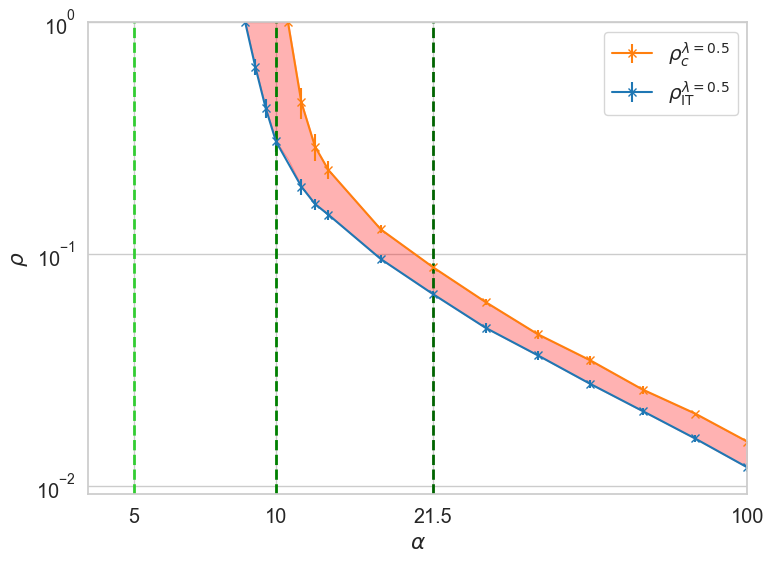

In [20]:
sns.set_theme(style="whitegrid", font_scale=1.3)
fig, ax = plt.subplots(figsize=(8, 6))
ax.errorbar(al_tab_2_l5,rho_cc_tab_2_l5,yerr=rho_sd_tab_2_l5,fmt='x-',label=r'$\rho_c^{\lambda=0.5}$', color='tab:orange')
ax.errorbar(al_tab_IT_2_l5,rho_IT_tab_2_l5,yerr=rho_sd_IT_tab_2_l5,fmt='x-',label=r'$\rho_{\rm IT}^{\lambda=0.5}$', color='tab:blue')

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$\alpha$')
ax.set_ylabel(r'$\rho$')
ax.set_ylim(plt.ylim()[0], 1)
ax.set_xlim(4, 100)
#ax.axvline(7.9573, color='red', linestyle='--', label=r'$\alpha=\alpha_{\rm AMP}$')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, loc='upper right')
plt.tight_layout()

x_start = 8.6
x_end = 100

x1 = al_tab_2_l5
y1 = rho_cc_tab_2_l5

x2 = al_tab_IT_2_l5
y2 = rho_IT_tab_2_l5

y_start = 1#y1[0] if x_start == x1[0] else y2[0]
y1_end = y1[-1] if x_end == x1[-1] else y2[-1]
y2_end = y2[-1]# if x_end == x1[-1] else y2[-1]

# Ensure all points from x1 and x2 are included in the interpolation
x_combined = sorted(set(np.r_[x_start, x1, x2, x_end]))
y1_combined = np.interp(x_combined, np.r_[x_start, x1, x_end], np.r_[y_start, y1, y1_end])
y2_combined = np.interp(x_combined, np.r_[x_start, x2, x_end], np.r_[y_start, y2, y2_end])

# Add the last point explicitly to ensure it is included
x_combined.append(x_end)
y1_combined = np.append(y1_combined, y1[-1])
y2_combined = np.append(y2_combined, y2[-1])

ax.axvline(x=5, linestyle='--', linewidth=2, color='limegreen')
ax.axvline(x=10, linestyle='--', linewidth=2, color='green')
ax.axvline(x=21.5, linestyle='--', linewidth=2, color='darkgreen')
ax.set_xticks([5, 10, 21.5, 100])
ax.set_xticklabels([5, 10, 21.5, 100])

# Fill the area between the two interpolated curves
plt.fill_between(x_combined, y1_combined, y2_combined, color="red", alpha=0.3)